# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [28]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [30]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [31]:
# Read the HTML tables into a list of DataFrames
mars_temps = pd.read_html('https://static.bc-edx.com/data/web/mars_facts/temperature.html')

# Check the number of tables found
print(f"Number of tables found: {len(mars_temps)}")

# Access the first table
table_df = mars_temps[0]

# Print the DataFrame
print(table_df)

Number of tables found: 1
        id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [32]:
# Create an empty list
rows = []
# Loop through the scraped data to create a list of rows
for row in table_df.itertuples(index=False):
    rows.append(list(row))

In [33]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = list(table_df.columns)
mars_weather_df = pd.DataFrame(rows, columns=column_names)

In [34]:
# Confirm DataFrame was created successfully
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [35]:
# Examine data type of each column
mars_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [36]:
print(mars_weather_df.dtypes)

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object


In [37]:
# Change data types for data analysis
mars_weather_df['terrestrial_date'] = mars_weather_df['terrestrial_date'].apply(pd.to_datetime)
mars_weather_df['id'].astype('object')


0          2
1         13
2         24
3         35
4         46
        ... 
1862    1889
1863    1892
1864    1894
1865    1893
1866    1895
Name: id, Length: 1867, dtype: object

In [38]:
# Confirm type changes were successful by examining data types again
mars_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [39]:
# 1. How many months are there on Mars?
# Count the number of occurrences of each month
num_months = mars_weather_df['month'].value_counts().sort_index()

# Print the number of months on Mars
print(num_months)


1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64


In [40]:
# Count the number of unique Martian days
num_martian_days = mars_weather_df['id'].nunique()

# Print the number of Martian days' worth of data
print(num_martian_days)


1867


In [41]:
# Calculate the average low temperature by month
by_month_avg_low_temp = mars_weather_df.groupby('month')['min_temp'].mean()

# Print the average low temperature by month
print(by_month_avg_low_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


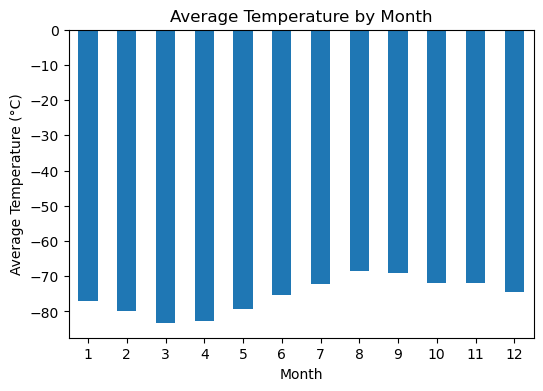

In [42]:
# Plot the average temperature by month
# Calculate the average temperature by month
by_month_avg_low_temp = mars_weather_df.groupby('month')['min_temp'].mean()

# Plot the average temperature by month
plt.figure(figsize=(6, 4))
by_month_avg_low_temp.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature by Month')
plt.xticks(rotation=0)
plt.show()


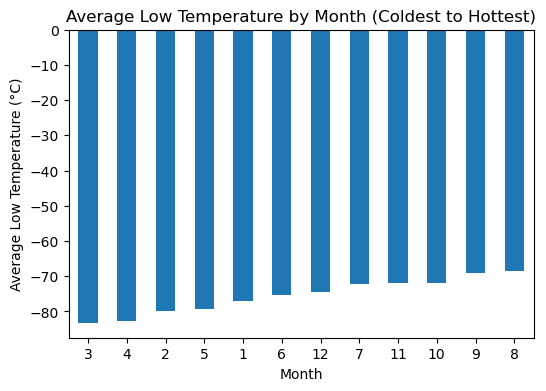

In [43]:
# Calculate the average low temperature by month
by_month_avg_low_temp = mars_weather_df.groupby('month')['min_temp'].mean()

# Sort the average low temperature in ascending order
sorted_by_avg_low_temp = by_month_avg_low_temp.sort_values(ascending=True)

# Plot the average low temperature by month in ascending order
plt.figure(figsize=(6, 4))
sorted_by_avg_low_temp.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (°C)')
plt.title('Average Low Temperature by Month (Coldest to Hottest)')
plt.xticks(rotation=0)
plt.show()


In [44]:
# 4. Average pressure by Martian month
# Calculate the average pressure by month
by_month_avg_pressure = mars_weather_df.groupby('month')['pressure'].mean()

# Print the average pressure by month
print(by_month_avg_pressure)


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


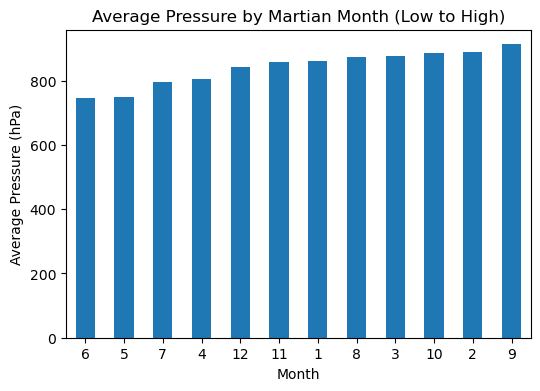

In [45]:
# Calculate the average pressure by month
by_month_avg_pressure = mars_weather_df.groupby('month')['pressure'].mean()

# Sort the average pressure in ascending order
sorted_by_avg_pressure = by_month_avg_pressure.sort_values(ascending=True)

# Plot the average pressure by month in ascending order
plt.figure(figsize=(6, 4))
sorted_by_avg_pressure.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Pressure (hPa)')
plt.title('Average Pressure by Martian Month (Low to High)')
plt.xticks(rotation=0)
plt.show()


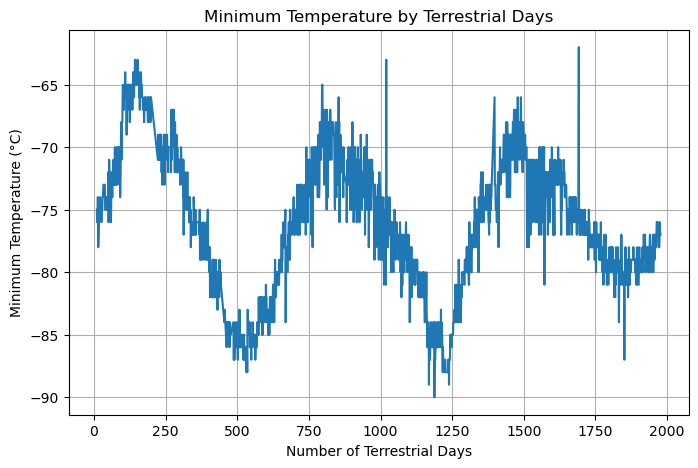

In [46]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.figure(figsize=(8, 5))
plt.plot(mars_weather_df['sol'], mars_weather_df['min_temp'])
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Minimum Temperature by Terrestrial Days')
plt.grid(True)
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [47]:
# Write the data to a CSV
mars_weather_df.to_csv("resources/mars_weather_data.csv", index=False)


In [48]:
browser.quit()